In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Data Science\Datasets\fraud_transactions_dataset.csv")
df.head()

,transaction_id,transaction_date,amount,transaction_type,device_type,location,account_age_days,is_fraud
0,1,2023-04-13,71.87,Online,Mobile,Germany,1665,0
1,2,2023-12-15,431.19,Online,Mobile,Canada,1673,0
2,3,2023-09-28,209.97,POS,Mobile,Canada,1174,0
3,4,2023-04-17,319.61,Transfer,Mobile,USA,367,0
4,5,2023-03-13,68.27,Online,Web,Germany,1247,0


In [4]:
df.tail()

,transaction_id,transaction_date,amount,transaction_type,device_type,location,account_age_days,is_fraud
49995,49996,2023-05-12,730.61,Online,Web,USA,1125,0
49996,49997,2023-06-28,298.19,POS,Mobile,Germany,1760,0
49997,49998,2023-12-05,189.80,Online,Web,USA,317,0
49998,49999,2023-04-08,291.30,Online,Web,India,325,0
49999,50000,2023-11-22,64.38,Online,Mobile,UK,88,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    50000 non-null  int64  
 1   transaction_date  50000 non-null  object 
 2   amount            50000 non-null  float64
 3   transaction_type  50000 non-null  object 
 4   device_type       50000 non-null  object 
 5   location          50000 non-null  object 
 6   account_age_days  50000 non-null  int64  
 7   is_fraud          50000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 3.1+ MB


In [6]:
df.describe()

,transaction_id,amount,account_age_days,is_fraud
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,201.543970,1001.505860,0.040220
std,14433.901067,201.290856,576.880231,0.196477
min,1.000000,0.010000,1.000000,0.000000
25%,12500.750000,58.370000,504.000000,0.000000
50%,25000.500000,138.365000,1004.000000,0.000000
75%,37500.250000,280.455000,1501.000000,0.000000
max,50000.000000,1841.440000,1999.000000,1.000000


In [7]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df["transaction_date"]

0       2023-04-13
1       2023-12-15
2       2023-09-28
3       2023-04-17
4       2023-03-13
           ...    
49995   2023-05-12
49996   2023-06-28
49997   2023-12-05
49998   2023-04-08
49999   2023-11-22
Name: transaction_date, Length: 50000, dtype: datetime64[ns]

In [8]:
df["hours"] = df["transaction_date"].dt.hour
df["hours"]

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: hours, Length: 50000, dtype: int32

In [9]:
df["day_of_week"] = df["transaction_date"].dt.day_name()
df["day_of_week"]

0         Thursday
1           Friday
2         Thursday
3           Monday
4           Monday
           ...    
49995       Friday
49996    Wednesday
49997      Tuesday
49998     Saturday
49999    Wednesday
Name: day_of_week, Length: 50000, dtype: object

In [10]:
df

,transaction_id,transaction_date,amount,transaction_type,device_type,location,account_age_days,is_fraud,hours,day_of_week
0,1,2023-04-13,71.87,Online,Mobile,Germany,1665,0,0,Thursday
1,2,2023-12-15,431.19,Online,Mobile,Canada,1673,0,0,Friday
2,3,2023-09-28,209.97,POS,Mobile,Canada,1174,0,0,Thursday
3,4,2023-04-17,319.61,Transfer,Mobile,USA,367,0,0,Monday
4,5,2023-03-13,68.27,Online,Web,Germany,1247,0,0,Monday
...,...,...,...,...,...,...,...,...,...,...
49995,49996,2023-05-12,730.61,Online,Web,USA,1125,0,0,Friday
49996,49997,2023-06-28,298.19,POS,Mobile,Germany,1760,0,0,Wednesday
49997,49998,2023-12-05,189.80,Online,Web,USA,317,0,0,Tuesday
49998,49999,2023-04-08,291.30,Online,Web,India,325,0,0,Saturday


In [11]:
df["month"] = df["transaction_date"].dt.month_name()
df

,transaction_id,transaction_date,amount,transaction_type,device_type,location,account_age_days,is_fraud,hours,day_of_week,month
0,1,2023-04-13,71.87,Online,Mobile,Germany,1665,0,0,Thursday,April
1,2,2023-12-15,431.19,Online,Mobile,Canada,1673,0,0,Friday,December
2,3,2023-09-28,209.97,POS,Mobile,Canada,1174,0,0,Thursday,September
3,4,2023-04-17,319.61,Transfer,Mobile,USA,367,0,0,Monday,April
4,5,2023-03-13,68.27,Online,Web,Germany,1247,0,0,Monday,March
...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2023-05-12,730.61,Online,Web,USA,1125,0,0,Friday,May
49996,49997,2023-06-28,298.19,POS,Mobile,Germany,1760,0,0,Wednesday,June
49997,49998,2023-12-05,189.80,Online,Web,USA,317,0,0,Tuesday,December
49998,49999,2023-04-08,291.30,Online,Web,India,325,0,0,Saturday,April


In [12]:
df["amount_bucket"] = pd.cut(
    df["amount"],
    bins = [0, 100, 500, 1000, 5000],
    labels = ["Low", "Medium", "High", "Very High"]
)
df

,transaction_id,transaction_date,amount,transaction_type,device_type,location,account_age_days,is_fraud,hours,day_of_week,month,amount_bucket
0,1,2023-04-13,71.87,Online,Mobile,Germany,1665,0,0,Thursday,April,Low
1,2,2023-12-15,431.19,Online,Mobile,Canada,1673,0,0,Friday,December,Medium
2,3,2023-09-28,209.97,POS,Mobile,Canada,1174,0,0,Thursday,September,Medium
3,4,2023-04-17,319.61,Transfer,Mobile,USA,367,0,0,Monday,April,Medium
4,5,2023-03-13,68.27,Online,Web,Germany,1247,0,0,Monday,March,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2023-05-12,730.61,Online,Web,USA,1125,0,0,Friday,May,High
49996,49997,2023-06-28,298.19,POS,Mobile,Germany,1760,0,0,Wednesday,June,Medium
49997,49998,2023-12-05,189.80,Online,Web,USA,317,0,0,Tuesday,December,Medium
49998,49999,2023-04-08,291.30,Online,Web,India,325,0,0,Saturday,April,Medium


In [13]:
df["amount"] > 5000

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: amount, Length: 50000, dtype: bool

In [14]:
df["amount"].max()

np.float64(1841.44)

In [15]:
df["account_age_group"] = pd.cut(
    df["account_age_days"],
    bins = [0, 90, 365, 1000, 5000],
    labels = ["New", "Young", "Mature", "old"]
)
df

,transaction_id,transaction_date,amount,transaction_type,device_type,location,account_age_days,is_fraud,hours,day_of_week,month,amount_bucket,account_age_group
0,1,2023-04-13,71.87,Online,Mobile,Germany,1665,0,0,Thursday,April,Low,old
1,2,2023-12-15,431.19,Online,Mobile,Canada,1673,0,0,Friday,December,Medium,old
2,3,2023-09-28,209.97,POS,Mobile,Canada,1174,0,0,Thursday,September,Medium,old
3,4,2023-04-17,319.61,Transfer,Mobile,USA,367,0,0,Monday,April,Medium,Mature
4,5,2023-03-13,68.27,Online,Web,Germany,1247,0,0,Monday,March,Low,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2023-05-12,730.61,Online,Web,USA,1125,0,0,Friday,May,High,old
49996,49997,2023-06-28,298.19,POS,Mobile,Germany,1760,0,0,Wednesday,June,Medium,old
49997,49998,2023-12-05,189.80,Online,Web,USA,317,0,0,Tuesday,December,Medium,Young
49998,49999,2023-04-08,291.30,Online,Web,India,325,0,0,Saturday,April,Medium,Young


In [16]:
total_tran = len(df)
total_tran

50000

In [17]:
fraud_tran = df["is_fraud"].sum()
fraud_tran

np.int64(2011)

In [18]:
fraud_rate = fraud_tran/total_tran * 100
fraud_rate

np.float64(4.022)

In [19]:
total_tran, fraud_tran, round(fraud_rate, 2)

(50000, np.int64(2011), np.float64(4.02))

In [20]:
group = df.groupby("transaction_type")
group

In [21]:
group.max()

,transaction_id,transaction_date,amount,device_type,location,account_age_days,is_fraud,hours,day_of_week,month,amount_bucket,account_age_group
transaction_type,,,,,,,,,,,,
Online,50000,2023-12-31,1841.44,Web,USA,1999,1,0,Wednesday,September,Very High,old
POS,49997,2023-12-31,1828.38,Web,USA,1999,1,0,Wednesday,September,Very High,old
Transfer,49982,2023-12-31,1624.67,Web,USA,1999,1,0,Wednesday,September,Very High,old


In [22]:
group.min()

,transaction_id,transaction_date,amount,device_type,location,account_age_days,is_fraud,hours,day_of_week,month,amount_bucket,account_age_group
transaction_type,,,,,,,,,,,,
Online,1,2023-01-01,0.03,Mobile,Canada,1,0,0,Friday,April,Low,New
POS,3,2023-01-01,0.02,Mobile,Canada,1,0,0,Friday,April,Low,New
Transfer,4,2023-01-01,0.01,Mobile,Canada,1,0,0,Friday,April,Low,New


In [23]:
group.describe()

transaction_id                                        \
                          count          mean  min       25%      50%   
transaction_type                                                        
Online                  24993.0  25111.907734  1.0  12571.00  25150.0   
POS                     15104.0  24794.314486  3.0  12288.75  24712.0   
Transfer                 9903.0  25033.804302  4.0  12645.50  24978.0   

                                                 transaction_date  \
                      75%      max           std            count   
transaction_type                                                    
Online            37693.0  50000.0  14446.836561            24993   
POS               37222.5  49997.0  14440.208707            15104   
Transfer          37353.0  49982.0  14389.635126             9903   

                                                 ... is_fraud            \
                                           mean  ...      max       std   
transaction_type                                 ...                      
Online            2023-07-01 14:04:08.037450496  ...      1.0  0.268777   
POS               2023-06-29 20:53:48.177966080  ...      1.0  0.045259   
Transfer          2023-07-01 16:08:34.753104896  ...      1.0  0.046003   

                    hours                                     
                    count mean  min  25%  50%  75%  max  std  
transaction_type                                              
Online            24993.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
POS               15104.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Transfer           9903.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 48 columns]

In [24]:
group.describe().T

transaction_type                               Online  \
transaction_id   count                        24993.0   
                 mean                    25111.907734   
                 min                              1.0   
                 25%                          12571.0   
                 50%                          25150.0   
                 75%                          37693.0   
                 max                          50000.0   
                 std                     14446.836561   
transaction_date count                          24993   
                 mean   2023-07-01 14:04:08.037450496   
                 min              2023-01-01 00:00:00   
                 25%              2023-03-31 00:00:00   
                 50%              2023-07-01 00:00:00   
                 75%              2023-10-01 00:00:00   
                 max              2023-12-31 00:00:00   
                 std                              NaN   
amount           count                        24993.0   
                 mean                      201.560449   
                 min                             0.03   
                 25%                            58.64   
                 50%                           138.09   
                 75%                           281.15   
                 max                          1841.44   
                 std                       201.608785   
account_age_days count                        24993.0   
                 mean                     1004.441604   
                 min                              1.0   
                 25%                            505.0   
                 50%                           1009.0   
                 75%                           1507.0   
                 max                           1999.0   
                 std                       578.283816   
is_fraud         count                        24993.0   
                 mean                        0.078382   
                 min                              0.0   
                 25%                              0.0   
                 50%                              0.0   
                 75%                              0.0   
                 max                              1.0   
                 std                         0.268777   
hours            count                        24993.0   
                 mean                             0.0   
                 min                              0.0   
                 25%                              0.0   
                 50%                              0.0   
                 75%                              0.0   
                 max                              0.0   
                 std                              0.0   

transaction_type                                  POS  \
transaction_id   count                        15104.0   
                 mean                    24794.314486   
                 min                              3.0   
                 25%                         12288.75   
                 50%                          24712.0   
                 75%                          37222.5   
                 max                          49997.0   
                 std                     14440.208707   
transaction_date count                          15104   
                 mean   2023-06-29 20:53:48.177966080   
                 min              2023-01-01 00:00:00   
                 25%              2023-03-30 00:00:00   
                 50%              2023-06-28 00:00:00   
                 75%              2023-09-29 00:00:00   
                 max              2023-12-31 00:00:00   
                 std                              NaN   
amount           count                        15104.0   
                 mean                      201.340324   
                 min                             0.02   
                 25%                          58.1775   
         

In [25]:
csv_file_path = 'transactions_dataset.csv'
df.to_csv(csv_file_path, index=False, header=True)

In [27]:
df.groupby("transaction_type")["is_fraud"].mean()*100

transaction_type
Online      7.838195
POS         0.205244
Transfer    0.212057
Name: is_fraud, dtype: float64

In [28]:
df.groupby("device_type")["is_fraud"].mean()*100

device_type
Mobile    6.612763
Web       0.198079
Name: is_fraud, dtype: float64

In [29]:
df.groupby("account_age_group")["is_fraud"].mean()*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_5528\316694574.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("account_age_group")["is_fraud"].mean()*100


account_age_group
New       34.036145
Young      2.607523
Mature     2.762258
old        2.416846
Name: is_fraud, dtype: float64

In [30]:
df.groupby("amount_bucket")["is_fraud"].mean()*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_5528\652835832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("amount_bucket")["is_fraud"].mean()*100


amount_bucket
Low           1.370770
Medium        1.362992
High         32.524272
Very High    32.944606
Name: is_fraud, dtype: float64

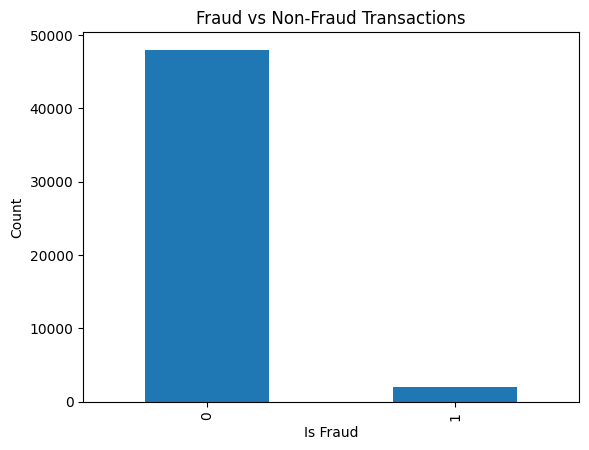

In [31]:
df["is_fraud"].value_counts().plot(kind="bar")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

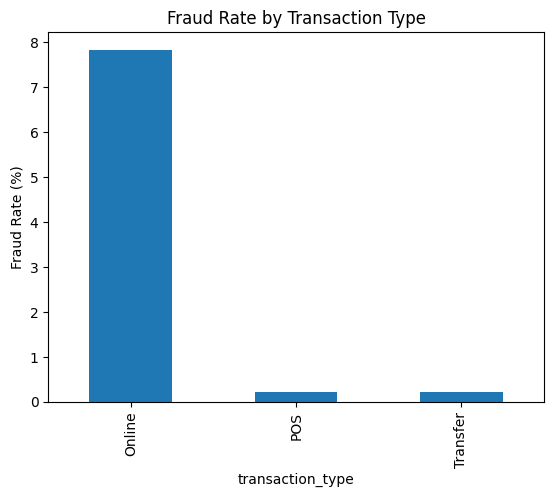

In [32]:
(df.groupby("transaction_type")["is_fraud"].mean() * 100).plot(kind="bar")
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate (%)")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5528\158651107.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("account_age_group")["is_fraud"].mean() * 100).plot(kind="bar")


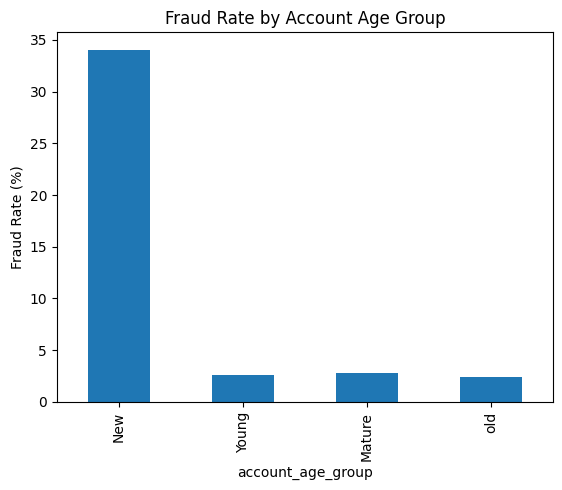

In [33]:
(df.groupby("account_age_group")["is_fraud"].mean() * 100).plot(kind="bar")
plt.title("Fraud Rate by Account Age Group")
plt.ylabel("Fraud Rate (%)")
plt.show()